# Практическое занятие №1. Основы теории сигналов

### Задание 1. Построение сигнала
Построить периодический сигнал, состоящий из 3 импульсов:
1) Прямоугольной формы
2) Формы равнобедренного треугольника
3) Двух равнобедренных треугольников
4) Произвольной формы

In [1]:
%pip install scipy
%pip install numpy

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift

%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_21762/312959479.py:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t, sig, linefmt='C3', markerfmt='D', use_line_collection=True)


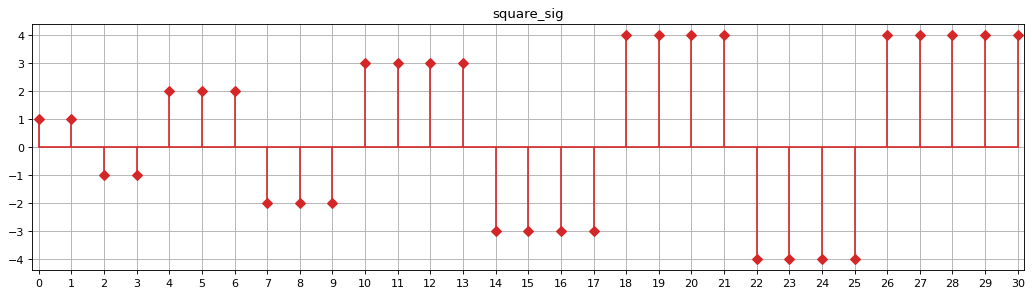

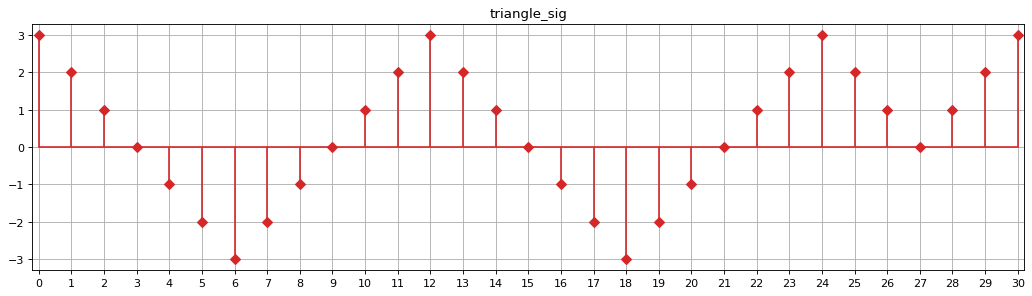

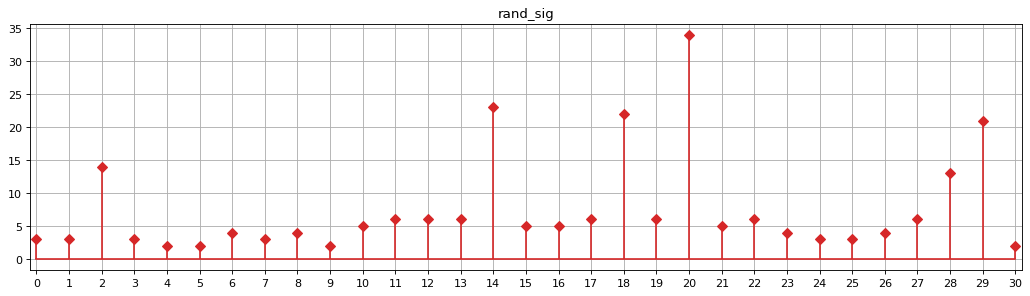

In [2]:
# SQUARES
# Digital signal
square_sig = np.array([1,1,-1,-1,2,2,2,-2,-2,-2,3,3,3,3,-3,-3,-3,-3,4,4,4,4, -4, -4, -4, -4, 4, 4, 4, 4, 4])

triangle_sig = np.array([3, 2, 1, 0, -1, -2, -3, -2, -1, 0, 1, 2, 3, 2, 1, 0, -1, -2, -3, -2, -1, 0, 1, 2, 3, 2, 1, 0, 1, 2, 3])
rand_sig = np.array([3,3,14,3,2,2,4, 3,4,2,5,6,6,6,23,5,5,6,22,6,34,5,6,4,3,3,4,6,13, 21, 2])

sig_array_1 = [square_sig, triangle_sig, rand_sig]
sig_array_names_1 = ['square_sig', 'triangle_sig', 'rand_sig']
i = 0
for sig in sig_array_1:
    # Time vector
    t = np.linspace(0, sig.size-1, sig.size, endpoint=True)

    # Plot figure
    fig = plt.figure(figsize=(16, 4), dpi=80)
    plt.title(sig_array_names_1[i]) 
    plt.stem(t, sig, linefmt='C3', markerfmt='D', use_line_collection=True)
    plt.xticks(t)
    plt.xlim([np.min(t)-0.2, np.max(t)+0.2])
    plt.grid(True)
    
    i += 1

### Задание 2. Построение спектров сигналов
Постройте спектры предыдущих сигналов

/tmp/ipykernel_21762/3201192943.py:22: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, use_line_collection=True, basefmt='C0')
/tmp/ipykernel_21762/3201192943.py:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(X, use_line_collection=True, basefmt='C0')


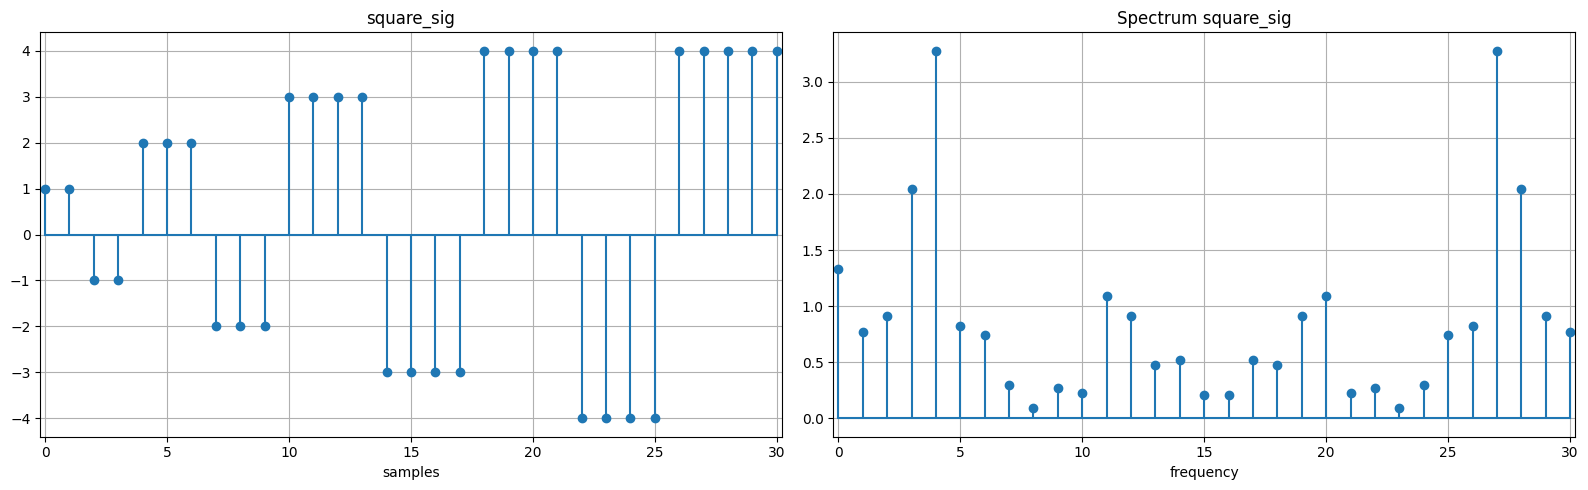

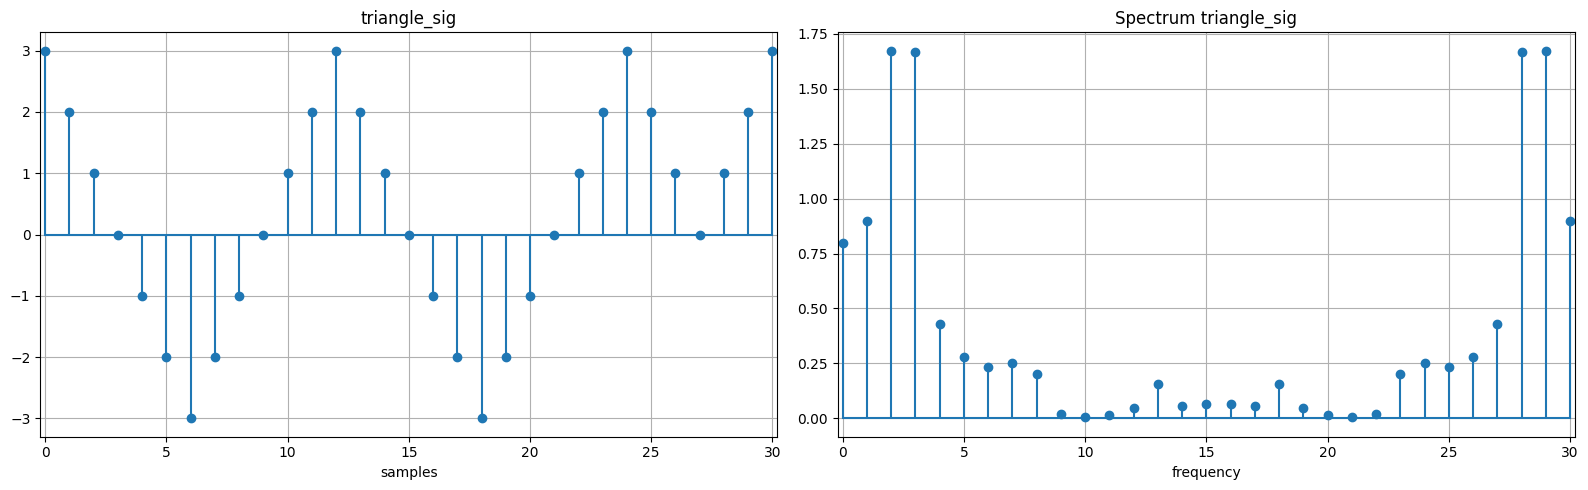

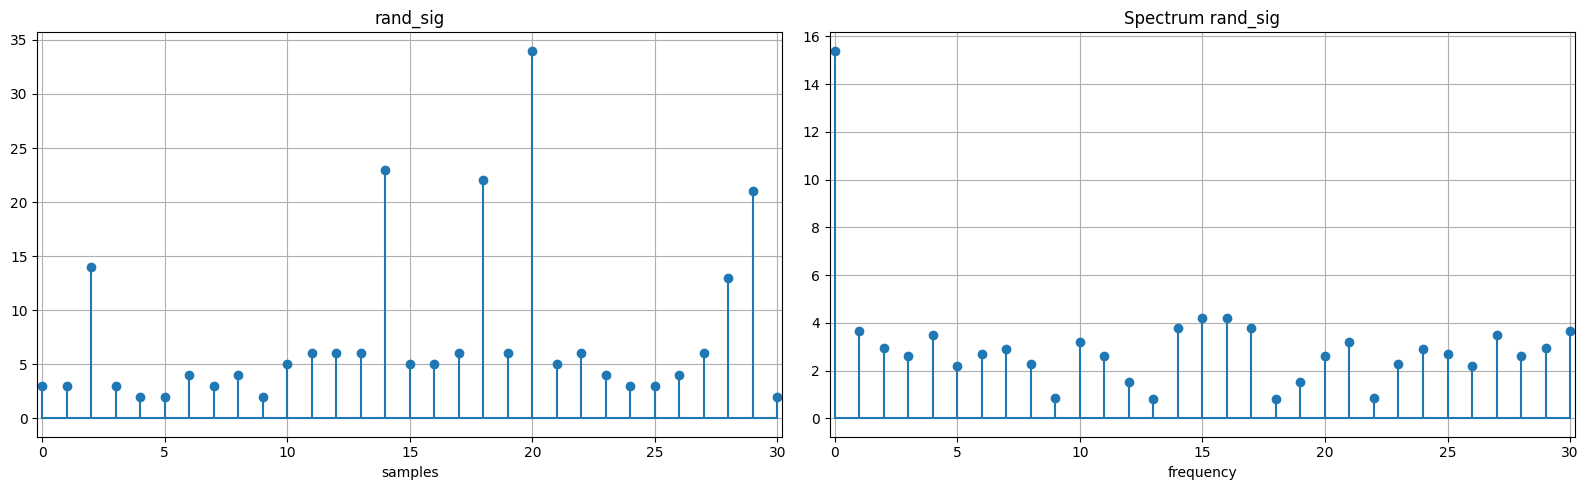

In [3]:
N = 30
# Time vector
t = np.linspace(0, 1, N)

# Amplitudes and freqs
i = 0
for x in sig_array_1:
    # Signal
    #x = np.array([3,3,3,3,-3,-3,-3,-3,3,3,3,3,-3,-3,-3,-3,3,3,3,3])
    #x = np.sin(20*np.pi*t)


    # Calculate FFT
    X = fft(x)
    X = 2*np.abs(X) / N

    # Plot results
    fig = plt.figure(figsize=(16, 5), dpi=100)
    # Time: signal
    plt.subplot(1, 2, 1)
    plt.title(sig_array_names_1[i])
    plt.stem(x, use_line_collection=True, basefmt='C0')
    plt.xlim([-0.2, N+0.2])
    plt.xlabel('samples')
    plt.grid()

    # Freq: Spectrum
    plt.subplot(1, 2, 2)
    plt.title('Spectrum ' + sig_array_names_1[i])
    plt.stem(X, use_line_collection=True, basefmt='C0')
    plt.xlim([-0.2, N+0.2])
    plt.xlabel('frequency')
    plt.grid()
    plt.tight_layout()
    
    i += 1

### Задание 3. Расчет передаваемого сообщения
1. Выпишите свои инициалы в формате Сидоров Петр Иванович (СПИ)
2. Переведи инициалы в транскрипцию (SPI)
3. Закодируйте инициалы в двоичный ASCII код. (далее - сообщение)
4. Запишите полученные значения в нижней ячейке

/tmp/ipykernel_21762/1205184915.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t, NAME_SIG, linefmt='C3', markerfmt='D', use_line_collection=True)


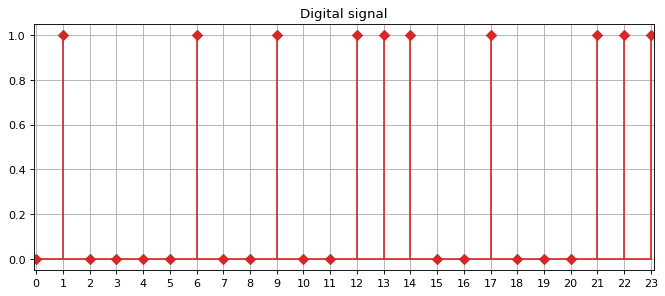

In [4]:
# binary ascii BNG : 01000010 01001110 01000111
NAME_SIG = np.array([0,1,0,0,0,0,1,0,0,1,0,0,1,1,1,0, 0,1,0,0,0,1,1,1])

# Time vector
t = np.linspace(0, NAME_SIG.size-1, NAME_SIG.size, endpoint=True)

# Plot figure
fig = plt.figure(figsize=(10, 4), dpi=80)
plt.title('Digital signal') 
plt.stem(t, NAME_SIG, linefmt='C3', markerfmt='D', use_line_collection=True)
plt.xticks(t)
plt.xlim([np.min(t)-0.1, np.max(t)+0.1])
plt.grid(True)

### Задание 4. Модуляция сигнала
Закодируйте передаваемый сигнал Вашим сообщением с использованием:
1) амплитудной модуляции, где амплитуда 10 - бит единицы, 5 - бит нуля.
2) частотной модуляции. На Ваш выбор.
3) Фазокодовой манипуляции. 0 - бит нуля, значение пи - бит единицы.

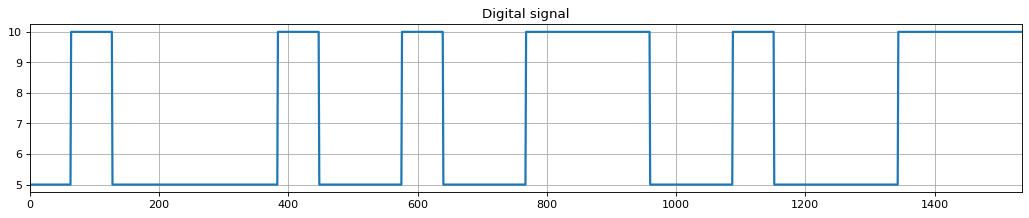

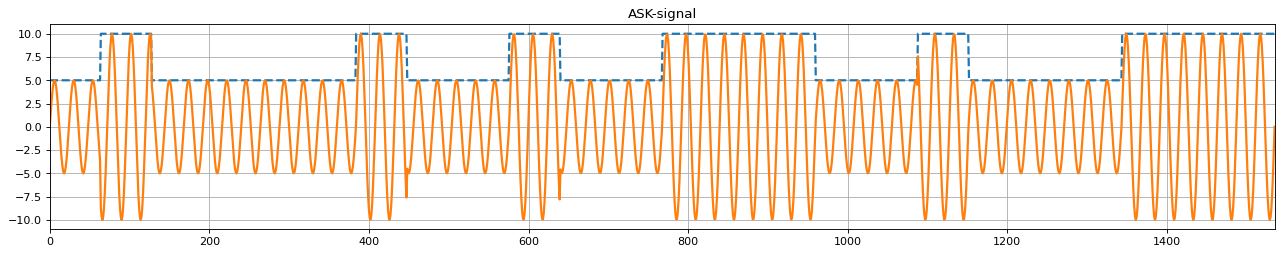

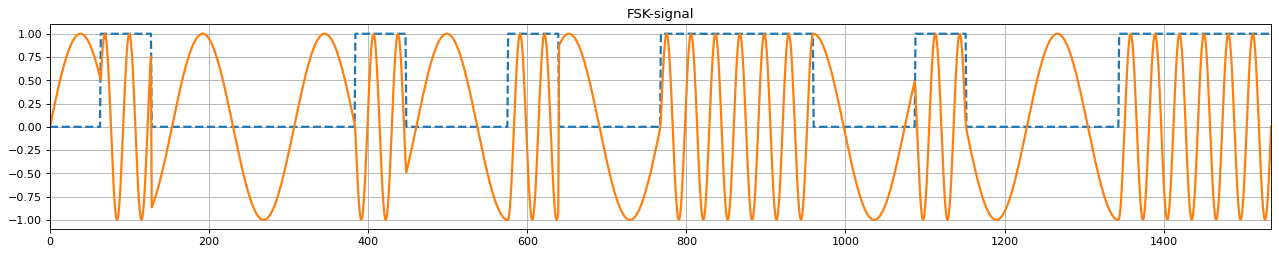

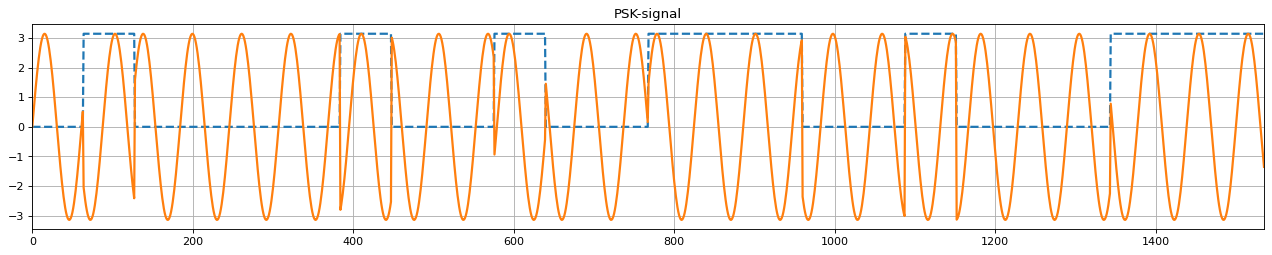

In [15]:
#Амплитудная манипуляция
N = 64

# np.array([0,1,0,0,0,0,1,0,0,1,0,0,1,1,1,0, 0,1,0,0,0,1,1,1])

# Random array of ones and zeros
digital_for_ASK = (NAME_SIG + 1) * 5
digital_for_FSK = NAME_SIG
digital_for_PSK = NAME_SIG * np.pi

digital_signals_arr = [digital_for_ASK, digital_for_FSK, digital_for_PSK]
mod = []
modulated_sig_array = []
modulated_sig_names = ['ASK', 'FSK', 'PSK']

# ASK signal
mod_ask = np.repeat(digital_for_ASK, repeats=N)
mod.append(mod_ask)

M = mod_ask.size
sig_ask = mod_ask * np.sin(64 * 2.0 * np.pi * np.linspace(0, 1, M))
modulated_sig_array.append(sig_ask)

# FSK signal
mod_fsk = np.repeat(digital_for_FSK, repeats=N)
mod.append(mod_fsk)
M = mod_fsk.size
mod_frq = np.zeros(M)

    # Set freq 'bits' (0, 1)
mod_frq[mod_fsk == 0] = 10
mod_frq[mod_fsk == 1] = 50

sig_fsk = np.sin(mod_frq *  2.0 * np.pi * np.linspace(0, 1, M))
modulated_sig_array.append(sig_fsk)

# PSK signal
mod_psk = np.repeat(digital_for_PSK, repeats=N)
mod.append(mod_psk)
M = mod_psk.size
sig_psk = np.pi * np.sin(25 * 2.0 * np.pi * np.linspace(0, 1, M) + np.pi * mod_psk)
modulated_sig_array.append(sig_psk)


# PLot results
plt.figure(figsize=(16, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title('Digital signal')
plt.plot(mod_ask, color='C0', linewidth=2.0)
plt.xlim([0, M-1])
plt.grid(True)

i = 0
for x in modulated_sig_array:
    plt.figure(figsize=(16, 6), dpi=80)
    plt.subplot(2, 1, 2)
    plt.title(modulated_sig_names[i] + '-signal')
    plt.plot(mod[i], '--', color='C0', linewidth=2.0)
    plt.plot(x, '-', color='C1', linewidth=2.0)
    plt.xlim([0, x.size-1])
    plt.grid(True)
    plt.tight_layout()
    i += 1

### Задание 5. Построение спектров сигналов передаваемых сообщений
Постройте спектры получившихся сигналов.

/tmp/ipykernel_21762/4220621938.py:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(X, use_line_collection=True, basefmt='C0')


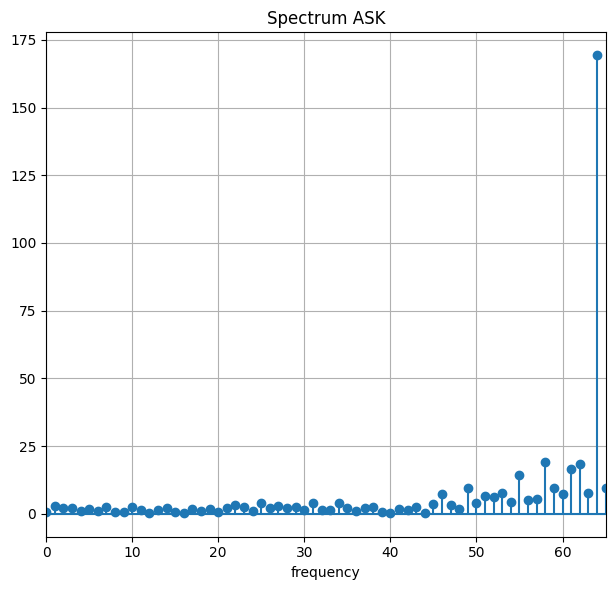

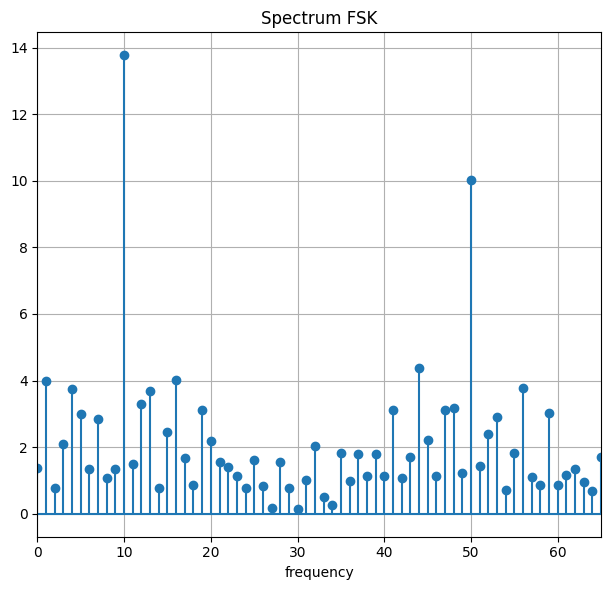

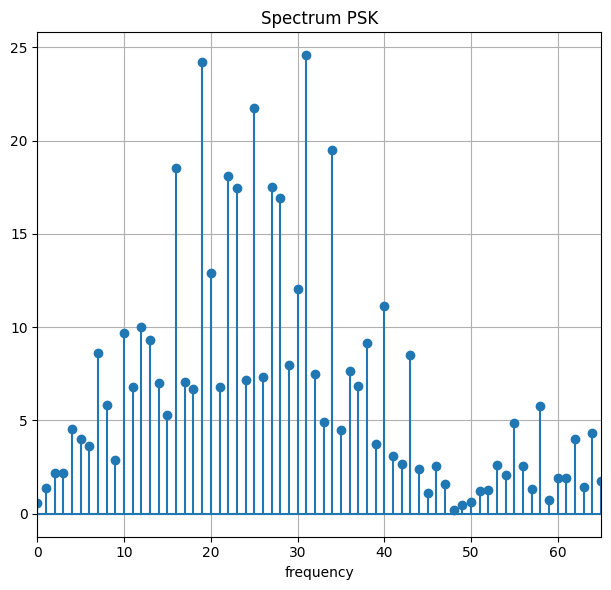

In [19]:
N = 64
i = 0
for x in modulated_sig_array:
    # Spectrum
    X = fft(x)
    X = 2*np.abs(X) / N

    plt.figure(figsize=(12, 6), dpi=100)
    
    # Freq: Spectrum
    plt.subplot(1, 2, 2)
    plt.title('Spectrum ' + modulated_sig_names[i])
    plt.stem(X, use_line_collection=True, basefmt='C0')
    plt.xlim([0, N+1])
    plt.xlabel('frequency')
    plt.grid()
    plt.tight_layout()
    i += 1
